In [2]:
import os
folders = [
    "data/raw",
    "notebooks",
    "outputs"
]

# Create folders if they don't exist
for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Project folders created successfully!")


Project folders created successfully!


In [4]:
import os

# List files in data/raw folder
print(os.listdir("data/raw"))

['.ipynb_checkpoints', 'insurance.csv']


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/raw/insurance.csv")

# Display the first 5 rows to get a sneak peek
print(df.head())

# Get a quick summary of the dataset
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [6]:
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# If duplicates exist, remove them
df = df.drop_duplicates()

# Quick summary statistics of numerical columns
print("\nSummary statistics:")
print(df.describe())

# Convert categorical variables to appropriate data types if needed
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

print("\nData types after conversion:")
print(df.dtypes)

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Number of duplicate rows: 1

Summary statistics:
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010

Data types after conversion:
age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


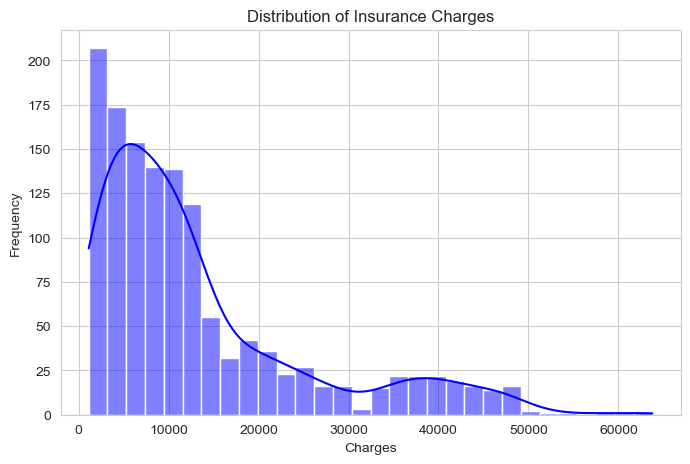

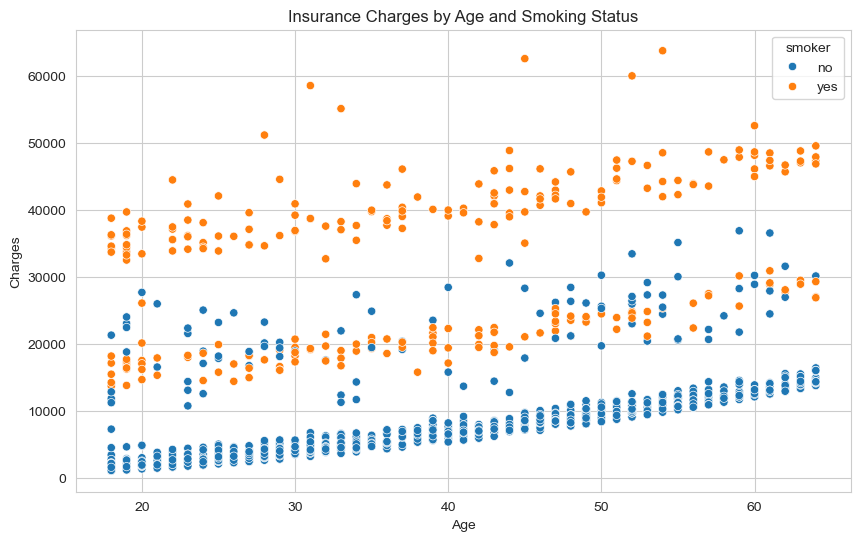

C:\Users\newto\AppData\Local\Temp\ipykernel_21080\1597209.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='region', y='charges', ci=None, palette='muted')
C:\Users\newto\AppData\Local\Temp\ipykernel_21080\1597209.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='region', y='charges', ci=None, palette='muted')


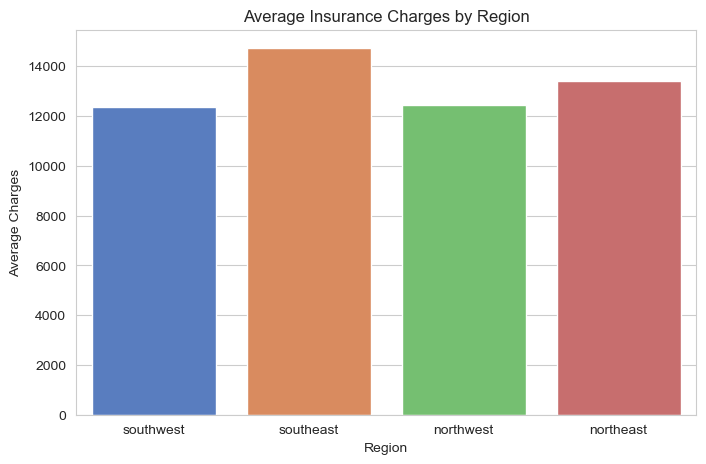

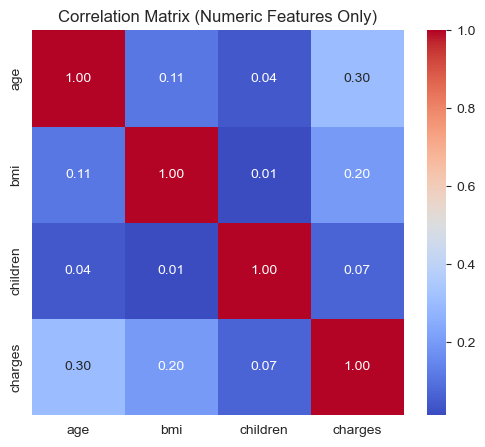

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# 1. Distribution of insurance charges (numerical)
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=30, kde=True, color='blue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# 2. Charges vs Age colored by smoker status (categorical)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Insurance Charges by Age and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# 3. Average charges by region (categorical)
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='region', y='charges', ci=None, palette='muted')
plt.title('Average Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

# 4. Correlation heatmap on numeric columns only
numeric_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(6,5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()

In [13]:
import os

# Create the 'data/processed' directory if it doesn't exist
os.makedirs("data/processed", exist_ok=True)

# Now save the cleaned dataframe
df.to_csv("data/processed/insurance_cleaned.csv", index=False)

In [14]:
import os
print(os.path.abspath("data/processed/insurance_cleaned.csv"))

C:\Users\newto\health insurance\data\processed\insurance_cleaned.csv
